Question 1

In [1]:
pip install opencv-python matplotlib numpy

Note: you may need to restart the kernel to use updated packages.


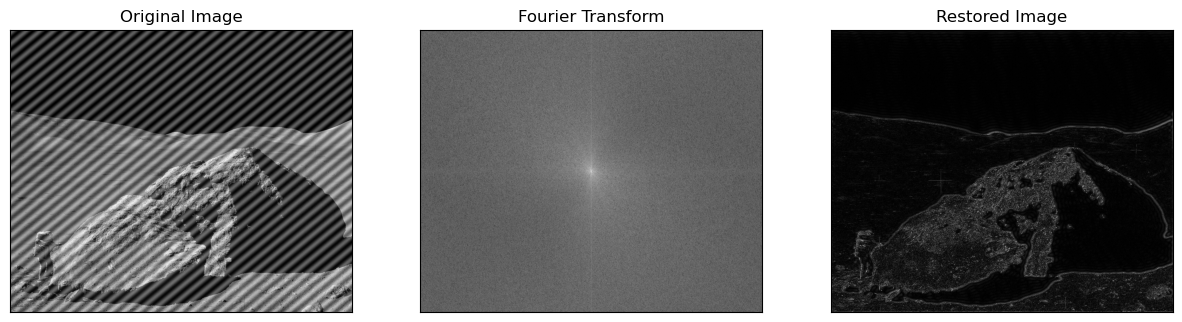

In [8]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Load the corrupted image
img = cv2.imread('HW2_DegradedImage.jpeg', 0)

# Compute the Fourier Transform of the image
f_img = np.fft.fft2(img)
fshift = np.fft.fftshift(f_img)

# Create a mask for the band reject filter
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2
mask = np.ones((rows, cols), np.uint8)
r = 50
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 0

# Apply the mask to the Fourier Transform
fshift_filtered = fshift * mask

# Compute the inverse Fourier Transform
f_ishift = np.fft.ifftshift(fshift_filtered)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

# Display the original, filtered, and restored images
plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 2), plt.imshow(np.log(1 + np.abs(fshift)), cmap='gray')
plt.title('Fourier Transform'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 3), plt.imshow(img_back, cmap='gray')
plt.title('Restored Image'), plt.xticks([]), plt.yticks([])

plt.show()

Question 2

In [4]:
pip install opencv-python numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


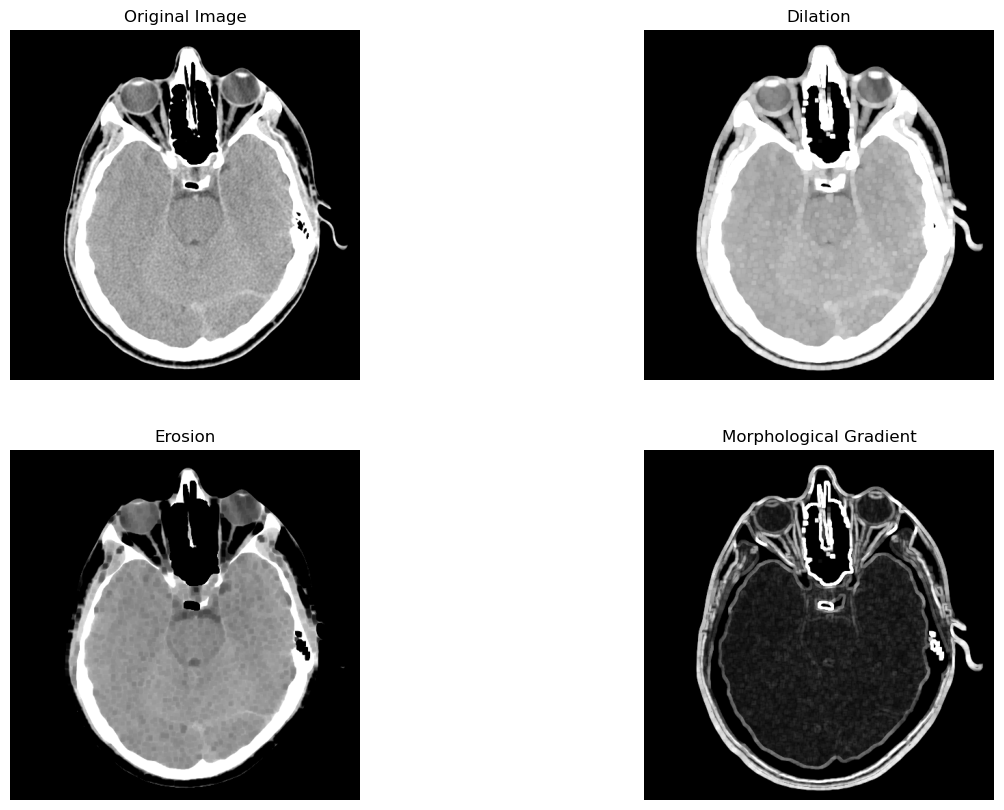

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the CT head image
img = cv2.imread('HW2_Head.tif', 0)

# Perform dilation
kernel = np.ones((5,5), np.uint8)
dilation = cv2.dilate(img, kernel, iterations = 1)

# Perform erosion
erosion = cv2.erode(img, kernel, iterations = 1)

# Compute morphological gradient
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

# Plot the images
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(dilation, cmap='gray')
plt.title('Dilation')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(erosion, cmap='gray')
plt.title('Erosion')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(gradient, cmap='gray')
plt.title('Morphological Gradient')
plt.axis('off')

plt.show()
